In [80]:
import pandas as pd
import numpy as np
import altair as alt
df = pd.read_csv("StudyEventTimeSeries.csv")

In [82]:
df = df.stack().reset_index()

df = df.rename(columns={
    "level_0":"t",
    "level_1":"user",
    0:"action"
})

In [87]:
df_user_lst = []
for user in list(df["user"].unique()):
#     userdf = df[df["user"]==user]
#     userdf[userdf["action"]=="BR"].index.values
    df_tmp = df[(df["user"]==user)&(df["action"]=="BR")]
    df_user = df[(df["user"]==user)]
    BR_indices = list(df_tmp.index.values)
    df_user["session_id"] =list(map(make_session_id, list(df_user.index.values)))
    df_user_lst.append(df_user)

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [90]:
df_session = pd.concat(df_user_lst).reset_index()

In [97]:
df_session_insightful = df_session[(df_session["action"] == 'IS') | (df_session["action"] == 'ID')]

In [98]:
df_session_insightful["insightful_session"] = True

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
df_session["insightful_session"]=False

In [122]:
df_session.head()

,index,t,user,action,session_id,insightful_session
0,0,0,A1,filter,0,False
1,9,1,A1,filter,0,False
2,18,2,A1,filter,0,False
3,27,3,A1,filter,0,False
4,36,4,A1,IS,0,False


In [124]:
user = 'A1'
df_tmp = df_session[(df_session['user'] == user) & ((df_session['action'] == 'IS') | (df_session['action'] == 'ID'))]
df_tmp

,index,t,user,action,session_id,insightful_session
4,36,4,A1,IS,0,False
8,72,8,A1,ID,0,False
11,99,11,A1,IS,0,False
31,267,31,A1,ID,2,False
34,285,34,A1,ID,2,False
48,335,48,A1,IS,4,False
57,354,57,A1,ID,6,False
65,363,65,A1,ID,7,False


In [134]:
df_session.apply?

Signature: df_session.apply(func, axis=0, broadcast=None, raw=False, reduce=None, result_type=None, args=(), **kwds)
Docstring:
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``). By default (``result_type=None``), the final return type
is inferred from the return type of the applied function. Otherwise,
it depends on the `result_type` argument.

Parameters
----------
func : function
    Function to apply to each column or row.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

    * 0 or 'index': apply function to each column.
    * 1 or 'columns': apply function to each row.
broadcast : bool, optional
    Only relevant for aggregation functions:

    * ``False`` or ``None`` : returns a Series whose length is the
      length of the index or the number of columns (based on the
      `axis` paramet

In [133]:
df_session.apply(lambda x: x[2])

index                     18
t                          2
user                      A1
action                filter
session_id                 0
insightful_session     False
dtype: object

In [136]:
df_user_list = []

for user in df_session['user'].unique():
    df_tmp = df_session[(df_session['user'] == user) & ((df_session['action'] == 'IS') | (df_session['action'] == 'ID'))]
    session_id_true = list(df_tmp['session_id'].unique())
    df_user = df_session[df_session['user'] == user]
    df_user['insightful_session'] = df_session['session_id'].apply(lambda x: True if (x in session_id_true) else False)
    df_user_list.append(df_user)
    #df_session['insightful_session'] = df_session.apply(lambda x: True if ((x['session_id'] in session_id_true) & (x['user'] == user)) else x)

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [138]:
df_user_session_insightfulness = pd.concat(df_user_list)

In [117]:
test = pd.merge(df_session,df_session_insightful,on=["t","user","action","session_id"],how="outer")
test["insightful_session_x"]+test["insightful_session_y"]

In [94]:
df_session["action"].filter(lambda x: ('IS' in x) or ('ID' in x))

TypeError: 'function' object is not iterable

In [73]:
def make_session_id(x):
    for index in BR_indices:
        if x<index: 
            return BR_indices.index(index)
    return len(BR_indices)

In [74]:
len(list(filter(lambda x: ('IS' in x) or ('ID' in x),sessions))) )

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
df

,t,user,action,session_id
0,0,A1,filter,0.0
1,0,A2,filter,NaN
2,0,A3,drag-and-drop,NaN
3,0,G1,representative-outlier,NaN
4,0,G2,representative-outlier,NaN
5,0,G3,ID,NaN
6,0,M1,PD,NaN
7,0,M2,show-scatter,NaN
8,0,M3,dynamic-class,NaN
9,1,A1,filter,0.0


In [75]:
df_user.index.values

array([  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108,
       117, 126, 135, 144, 153, 162, 171, 180, 189, 198, 206, 214, 222,
       230, 238, 246, 253, 260, 267, 273, 279, 285, 290, 294, 298, 302,
       306, 310, 314, 317, 320, 323, 326, 329, 332, 335, 338, 340, 342,
       344, 346, 348, 350, 352, 354, 356, 357, 358, 359, 360, 361, 362,
       363, 364, 365, 366, 367])

In [71]:
["a",'b'].index("a")

0

# Compiling everything into sessions

In [41]:
df = pd.read_csv("StudyEventTimeSeries.csv")
sessions=[]
for row in df.as_matrix().T: 
    session=[]
    for action in row:
        if action is not np.NaN:
            if action=="BR":
                if session!=[]:
                    sessions.append(session)
                session=[]
            else:
                session.append(action)
    if session!=[]:
        sessions.append(session)

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
#Overall Counts
from collections import Counter
overall_sessions_flat  = [item for sublist in sessions  for item in sublist]

In [43]:
print ("Number of sessions with at least one insight:", len(list(filter(lambda x: ('IS' in x) or ('ID' in x),sessions))) )

Number of sessions with at least one insight: 30


In [44]:
insightful_sessions = list(filter(lambda x: ('IS' in x) or ('ID' in x),sessions))

In [45]:
insightful_sessions_flat  = [item for sublist in insightful_sessions  for item in sublist]

In [46]:
insightful_sessions_flat_filtered = list(filter(lambda x: x in featureOnly, insightful_sessions_flat)) #filter out action codes with capital letters

In [47]:
x = Counter(insightful_sessions_flat_filtered)
df = pd.DataFrame(x.most_common(),columns=["Feature","Usage Frequency"])

In [48]:
chart = alt.Chart(df).mark_bar().encode(
    alt.X("Usage Frequency"),#,sort=alt.SortField(field='Usage Frequency', order='descending'))
    alt.Y("Feature")
)

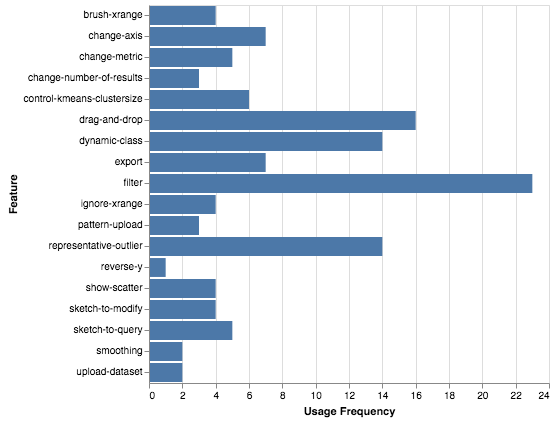

In [49]:
chart